In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import DataProcess as DP

In [2]:
datalabels=[]
for i in range(1,10):
    feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
    datalabels.append(datalabelsi)

In [4]:
# Stack data from different subjects into one chunk:
datalabels=np.vstack(datalabels)

data=datalabels[:,:-1]
label=datalabels[:,-1]

datanorm=data/np.std(data,axis=0)

U,s,V=np.linalg.svd(data,full_matrices=False)

spectrum=s**2/sum(s**2)

accu=np.array([sum(spectrum[:i+1]) for i in range(198)])

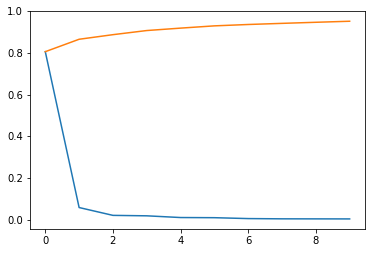

In [11]:
plt.plot(spectrum[:10])
plt.plot(accu[:10])

In [12]:
datax=data.dot(V[0])
datay=data.dot(V[1])
dataz=data.dot(V[2])

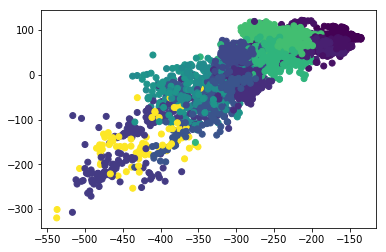

In [13]:
import numpy
import pylab
xy = numpy.zeros((2, 3330))
xy[0] = datax
xy[1] = datay
colors = label
pylab.scatter(xy[0], xy[1], c=colors)
pylab.show()

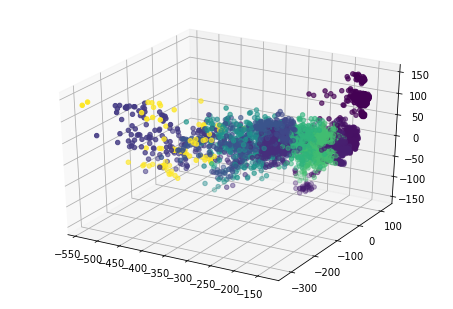

In [14]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(datax,datay,dataz,c=label)
pyplot.show()

In [12]:
trdata=np.hstack((np.reshape(label, (3330, 1)), data.dot(V.T)[:,:3]))
trdict = {}
for a in np.unique(label):
    trdict[a] = trdata[np.where(trdata[:, 0]==a)[0]][:, 1:]

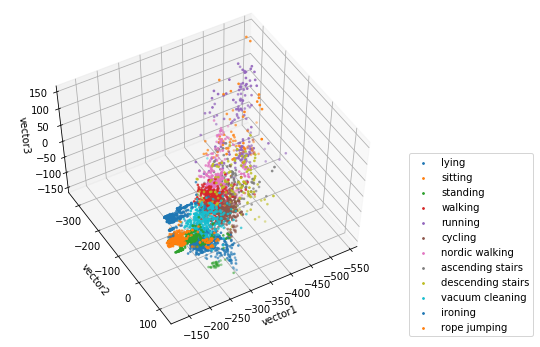

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[7, 6])
ax=fig.add_subplot(111, projection='3d')
for a in np.unique(label):
    ax.scatter(trdict[a][:,0], trdict[a][:,1], trdict[a][:,2], s=3, label=DP.activity_dict[a])

ax.set_xlabel('vector1')
ax.set_ylabel('vector2')
ax.set_zlabel('vector3')
ax.view_init(elev=55, azim=60)
ax.legend(loc=(1.02,0));

In [14]:
# Interactive plot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace = []
for a in np.unique(label):
    trace.append(go.Scatter3d(x=trdict[a][:,0], y=trdict[a][:,1], z=trdict[a][:,2], 
                              mode='markers', marker=dict(size=3)))
    
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
py.iplot(go.Figure(data=trace, layout=layout))